In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py

In [51]:
import chart_studio
chart_studio.tools.set_credentials_file(username='kmohan_ts', api_key='DQQyWqXWsC1Cma8ld4Ud')

In [6]:
energy_data = pd.read_csv('~/Documents/Projects/covid-energy-burden/energy_data_with_predictions.csv')

In [12]:
energy_data.columns

Index(['date', 'month', 'sales_mkwh', 'state', 'sector', 'consumers', 'price',
       'revenue', 'use_per_capita', 'region', 'cooling_days', 'heating_days',
       'COM', 'RES', 'time', 'year', 'mon', 'season', 'num_days', 'num_hols',
       'pct_weekdays', 'y', 'yhat_20', 'pred_year', 'pct_error_20'],
      dtype='object')

In [7]:
energy_data.head()

,date,month,sales_mkwh,state,sector,consumers,price,revenue,use_per_capita,region,...,year,mon,season,num_days,num_hols,pct_weekdays,y,yhat_20,pred_year,pct_error_20
0,2020-10-01,202010,2137.29371,AL,RES,2286425.0,13.07,27934.428790,934.775341,ESC,...,2020,10,fall,31,10,0.677419,30.154043,31.097894,2020,-3.130098
1,2020-09-01,202009,2875.42861,AL,RES,2325509.0,13.18,37898.149080,1236.472794,ESC,...,2020,9,fall,30,9,0.700000,41.215760,43.135998,2020,-4.658990
2,2020-08-01,202008,3569.57496,AL,RES,2322835.0,12.76,45547.776490,1536.732036,ESC,...,2020,8,summer,31,10,0.677419,49.572001,49.720861,2020,-0.300289
3,2020-07-01,202007,3587.72858,AL,RES,2319406.0,12.69,45528.275680,1546.830775,ESC,...,2020,7,summer,31,9,0.709677,49.897767,53.677423,2020,-7.574801
4,2020-06-01,202006,2912.11315,AL,RES,2314926.0,12.93,37653.623029,1257.972458,ESC,...,2020,6,summer,30,8,0.733333,41.932415,43.495995,2020,-3.728809


In [108]:
pre_covid_error = energy_data.groupby(['state','sector']).apply(get_pre_covid_errors).reset_index().rename(columns={0:'pre_covid_error'})
post_covid_error = energy_data.groupby(['state','sector']).apply(get_post_covid_errors).reset_index().rename(columns={0:'post_covid_error'})

In [110]:
pre_post_error = pre_covid_error.merge(post_covid_error,on=['state','sector'])

In [112]:
energy_data = energy_data.merge(pre_post_error,on=['state','sector'])

In [115]:
energy_data['pre_post_diff'] = energy_data['post_covid_error'] - energy_data['pre_covid_error']

In [143]:
energy_data['anno_text'] = ['<b>+'+str(np.round(x,2))+'%</b>' if x>0 else '<b>'+str(np.round(x,2))+'%</b>' for x in energy_data['pre_post_diff']]
energy_data['anno_color'] = ['green' if x>0 else 'red' for x in energy_data['pre_post_diff']]

In [182]:
list(energy_data[(energy_data.state=='AZ')&(energy_data.sector=="RES")].anno_color)[0]

'green'

In [184]:
states = energy_data[~(energy_data.state =='USA')].state.unique()

In [190]:
states = ['USA']

In [192]:
states.extend(energy_data[~(energy_data.state =='USA')].state.unique())

In [195]:
energy_data['state_name'] = [abbrev_us_state[s] for s in energy_data['state']]

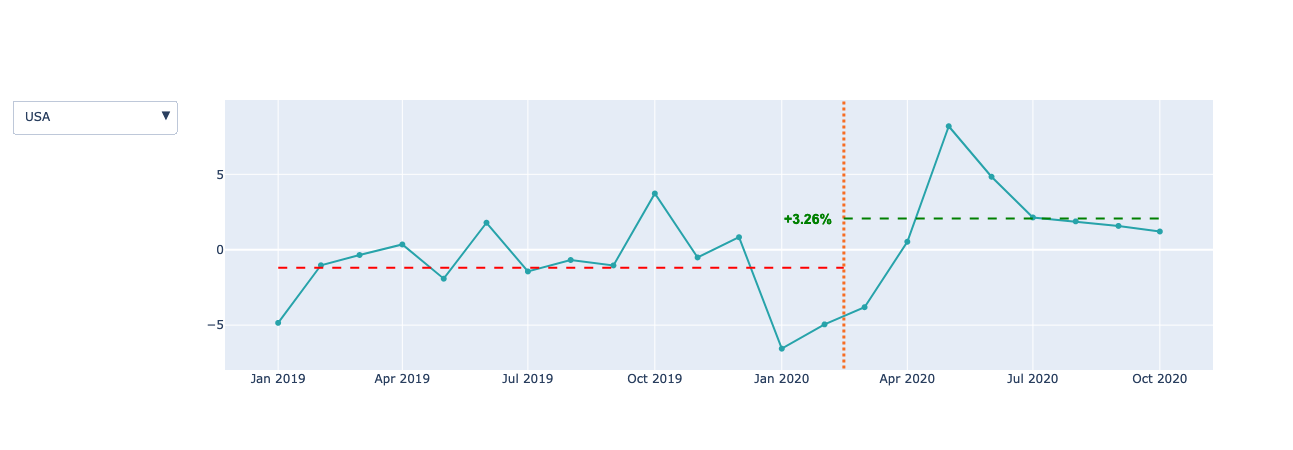

'https://plotly.com/~kmohan_ts/3/'

In [197]:
# fig = px.line(energy_data[(energy_data.state=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)], x="date", y="pct_error_20", title='Error in prediction')
# fig.add_shape(type='line',x0='2020-02-15',x1='2020-02-15')

# # fig = go.Figure(go.Scatter(x=energy_data[(energy_data.state=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].date,
# #                            y=np.round(energy_data[(energy_data.state=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error_20,2),mode='lines+markers',marker_color='#27a3aa'))
fig = go.Figure()
fig.add_trace(go.Scatter(x=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].date,
                         y=np.round(energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error_20,2),
                         mode='lines+markers',marker_color='#27a3aa',visible=True))
# fig = px.scatter(energy_data[(energy_data.state=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)],
#                 x='date',
#                 y='pct_error_20'
#                 )
fig.add_shape(type='line',
              x0='2020-02-15',x1='2020-02-15',
              y0=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error_20.min()*1.2,
              y1=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error_20.max()*1.2,
              line=dict(color='#f76d23', width=3, dash="dot"))
fig.add_shape(type='line',
              x0='2019-01-01',x1='2020-02-15',
              y0=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].pre_covid_error.min(),
              y1=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].pre_covid_error.min(),
              line=dict(color='red', width=2, dash="dash"))
fig.add_shape(type='line',
              x0='2020-02-15',x1='2020-10-01',
              y0=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].post_covid_error.min(),
              y1=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].post_covid_error.min(),
              line=dict(color='green', width=2, dash="dash"))
fig.add_annotation(x='2020-01-20',
                  y=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].post_covid_error.min(),
                  text=list(energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].anno_text)[0],
                  showarrow=False,
                  font_size=14,
                  font_family='Arial',
                  font_color=list(energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].anno_color)[0] 
                  )

updatemenu = []
buttons = []
states = ['USA']
states.extend(energy_data[~(energy_data.state_name =='USA')].state_name.unique())

for state in states:
    buttons.append(dict(method='update',
                        label=state,
                        visible=True,
                        args=[#update to trace
                            {'y':[np.round(energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error_20,2)],
                               'x':[energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")&(energy_data.year >= 2019)].date],
                               'type':'scatter'},
                            #update to layout
                            {'title':'% Prediction error in residential consumption for '+state,
                             'annotations':[{'x':'2020-01-20',
                                             'y':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].post_covid_error.min(),
                                             'text':list(energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].anno_text)[0],
                                             'showarrow':False,'font_size':14,'font_family':'Arial',
                                             'font_color':list(energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].anno_color)[0] }],
                            'shapes':[{'type':'line',
                                       'x0':'2019-01-01','x1':'2020-02-15',
                                       'y0':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].pre_covid_error.min(),
                                       'y1':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].pre_covid_error.min(),
                                       'line':dict(color='red', width=2, dash="dash")},
                                     {'type':'line',
                                       'x0':'2020-02-15','x1':'2020-10-01',
                                       'y0':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].post_covid_error.min(),
                                       'y1':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].post_covid_error.min(),
                                       'line':dict(color='green', width=2, dash="dash")},
                                     {'type':'line',
                                       'x0':'2020-02-15','x1':'2020-02-15',
                                       'y0':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error_20.min()*1.2,
                                       'y1':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error_20.max()*1.2,
                                       'line':dict(color='#f76d23', width=3, dash="dot")}]},
                            [0]]))

    # some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()

py.plot(fig, filename = 'res-energy-states', auto_open=True)

### Geo plot

In [104]:
def mean_errors(df, col='pct_error_20'):
    pre_covid = df[(df.date<'2020-03-01')&(df.date >= '2019-01-01')][col].mean()
    post_covid = df[df.date>='2020-03-01'][col].mean()
    diff = post_covid - pre_covid
    return diff
#     return {'pre_covid':pre_covid, 'post_covid':post_covid}

def get_pre_covid_errors(df, col='pct_error_20'):
    pre_covid = df[(df.date<'2020-03-01')&(df.date >= '2019-01-01')][col].mean()
    return pre_covid

def get_post_covid_errors(df, col='pct_error_20'):
    post_covid = df[df.date>='2020-03-01'][col].mean()
    return post_covid

In [37]:
mean_change = pd.DataFrame(energy_data.groupby(['state','sector']).apply(mean_errors).reset_index().rename(columns={0:'change'}))

In [38]:
mean_res_change = mean_change[mean_change.sector=="RES"]

In [29]:
mean_res_change.head()

,state,sector,change,text
1,AL,RES,-1.209087,-1.21%
3,AR,RES,-3.622929,-3.62%
5,AZ,RES,6.852560,6.85%
7,CA,RES,6.501631,6.5%
9,CO,RES,5.653217,5.65%


In [35]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'USA':'USA'
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [41]:
mean_res_change['state_name'] = [abbrev_us_state[s] for s in mean_res_change['state']]

<ipython-input-41-6c49b7cb3697>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
mean_res_change.head()

,state,sector,change,state_name
1,AL,RES,-1.209087,Alabama
3,AR,RES,-3.622929,Arkansas
5,AZ,RES,6.852560,Arizona
7,CA,RES,6.501631,California
9,CO,RES,5.653217,Colorado


In [45]:
mean_res_change['text'] = [s + ': ' + str(np.round(c,2)) + '%' for s,c in zip(mean_res_change['state_name'],mean_res_change['change'])]

<ipython-input-45-a7976fb9e73e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



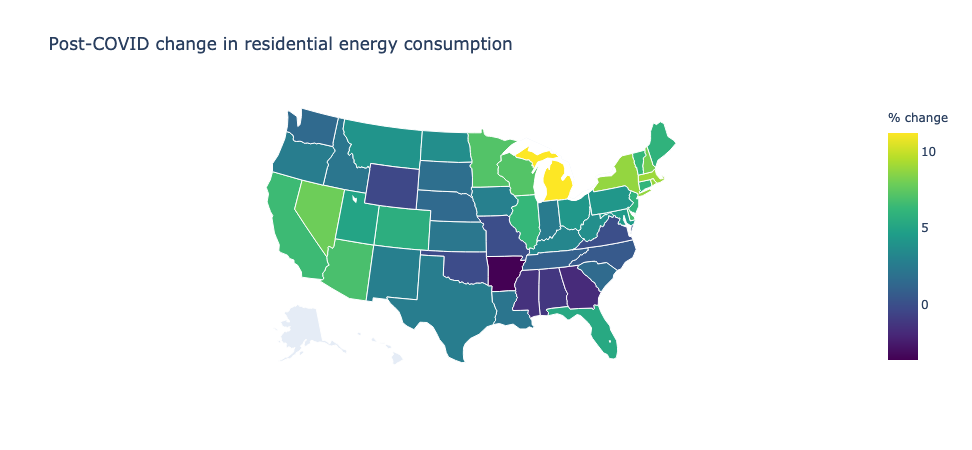

'https://plotly.com/~kmohan_ts/1/'

In [52]:
fig = go.Figure(data=go.Choropleth(
    locations=mean_res_change['state'], # Spatial coordinates
    z = mean_res_change['change'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'viridis',
    text=mean_res_change['text'],
    colorbar_title = "% change",
    marker_line_color='white', # line markers between states
    hoverinfo = "text"
))

fig.update_layout(
    title_text = 'Post-COVID change in residential energy consumption',
    geo_scope='usa', # limite map scope to USA
    geo= dict(projection=go.layout.geo.Projection(type = 'albers usa'))
)

fig.show()

py.plot(fig, filename = 'res-energy-geo', auto_open=True)